In [15]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

f = open('Accidents.csv', 'r')
cs = csv.reader(f)

data = []

for row in cs:
    lon = float(row[0])
    lat = float(row[1])
    data.append([lon, lat])

X = np.asarray(data)

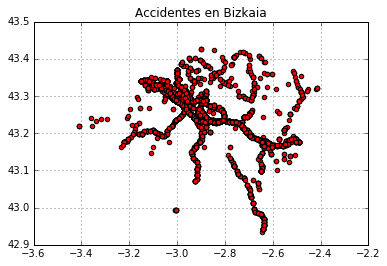

In [16]:
# Plot accidents
fig, ax = plt.subplots()
plt.scatter(X[:,0], X[:,1], c='r', marker='o')
ax.grid(True)
plt.title('Accidentes en Bizkaia')
plt.show()

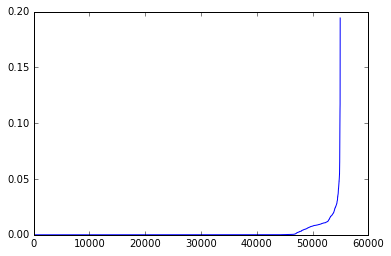

In [17]:
# Compute k-nearest neighboors
from sklearn.neighbors import DistanceMetric, kneighbors_graph
dist = DistanceMetric.get_metric('euclidean')
matdist = dist.pairwise(X)

min_samples = 10
A = kneighbors_graph(X, min_samples, include_self=False)
Arr = A.toarray()

seq = []
for i in xrange(len(data)):
    for j in xrange(len(data)):
        if Arr[i][j] != 0:
            seq.append(matdist[i][j])
            
seq.sort()
plt.plot(seq)
plt.show()

In [18]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.0095, min_samples=10).fit(X)
unique_labels = set(db.labels_)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print 'Número de clusters: ', n_clusters

Número de clusters:  65


In [19]:
# Validation/Evaluation
from sklearn import metrics
print "Silhoutte Coefficient: %0.3f" % metrics.silhouette_score(X, db.labels_)

Silhoutte Coefficient: 0.196


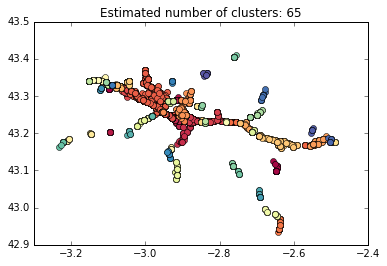

In [21]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k != -1:
        class_member_mask = (db.labels_ == k)
        xy = X[db.labels_ == k]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()